<a href="https://colab.research.google.com/github/Acippppp/ggplot/blob/master/FinancialReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
import re

In [3]:
df = pd.read_csv('drive/MyDrive/financial_report.csv')
df


,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref
0,ENGLOTECHS HOLDING BHD,ENGLOTC \n,31/12/2004,4,31/12/2004,28 Feb 2005,20947,20852.0,85660,75408.0,"2,196","3,157","10,425","11,159","2,088","2,728","9,161","9,438",562307
1,COMSA FARMS BERHAD,COMSA \n,31/12/2004,3,31/03/2005,28 Feb 2005,60978,52718.0,188551,168711.0,"2,523","2,948","10,238","8,794","2,626","3,320","9,069","10,320",562310
2,WOO HING BROTHERS (MALAYA) BERHAD,WOOHING \n,31/12/2004,4,31/12/2004,28 Feb 2005,0,0.0,0,711.0,-152,"-2,041",-847,"-8,031",-152,"-2,041",-847,"-8,031",562329
3,CME GROUP BERHAD,CME \n,31/12/2004,4,31/12/2004,25 Feb 2005,1615,12703.0,2041,14958.0,"-1,215",-986,"-4,862","-3,694","-1,215","-1,113","-4,862","-3,821",562336
4,PANTAI HOLDINGS BERHAD,PANTAI \n,31/12/2004,2,30/06/2005,22 Feb 2005,167865,151478.0,340327,297237.0,"15,664","8,614","31,416","16,392","10,008","4,385","19,508","8,718",562342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,IFCA MSC BERHAD,IFCAMSC,31-Dec-18,3 Qtr,30-Sep-18,16-Nov-18,22196,23003.0,60959,62889.0,"2,200","2,708","5,664","8,677","1,403","1,864","2,985","5,818",2905712
8592,MISC BERHAD,MISC,31-Dec-18,3 Qtr,30-Sep-18,19-Nov-18,2229200,2315800.0,6391800,7603200.0,"351,100","706,200","988,800","1,961,500","339,200","695,800","957,400","1,943,500",2905860
8593,ACOUSTECH BERHAD,ACOSTEC,31-Dec-18,3 Qtr,30-Sep-18,19-Nov-18,10789,12920.0,29542,30189.0,"-1,066","-2,713","-1,910","-8,949","-1,108","-2,844","-2,035","-8,056",2906030
8594,PANSAR BERHAD,PANSAR,31-Mar-19,2 Qtr,30-Sep-18,21-Nov-18,97407,97056.0,194553,187401.0,"1,868","3,230","5,003","5,857","1,251","2,498","3,630","4,554",2906331


In [4]:
df['stock_name'] = df['stock_name'].str.replace('\n','').str.replace(' ','')
#df['stock_name']=df['stock_name'].replace(r"^ +| +$", r"", regex=True, inplace=True)
df['qtr'] = df['qtr'].str.replace('Qtr','').str.replace('Other','0').str.replace(' ','').astype(int)
df['fye'] = pd.to_datetime(df['fye'])
df['qrd'] = pd.to_datetime(df['qrd'])
df['date_announced'] = pd.to_datetime(df['date_announced'])
#Extract Year from fye
df['Year'] = pd. DatetimeIndex(df['fye']). year
#Extrace Year annouced 
df['Year_ann'] = pd. DatetimeIndex(df['date_announced']). year
df['cippl'] = df['cippl'].str.replace(',','').astype(float)
df['pippl'] = df['pippl'].str.replace(',','').astype(float)
df['ccppl'] = df['ccppl'].str.replace(',','').astype(float)
df['pcppl'] = df['pcppl'].str.replace(',','').astype(float)
df['cipplt'] = df['cipplt'].str.replace(',','').astype(float)
df['pipplt'] = df['pipplt'].str.replace(',','').astype(float)
df['ccpplt'] = df['ccpplt'].str.replace(',','').astype(float)
df['pcpplt'] = df['pcpplt'].str.replace(',','').astype(float)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         8596 non-null   object        
 1   stock_name      8596 non-null   object        
 2   fye             8596 non-null   datetime64[ns]
 3   qtr             8596 non-null   int64         
 4   qrd             8596 non-null   datetime64[ns]
 5   date_announced  8596 non-null   datetime64[ns]
 6   cipr            8596 non-null   int64         
 7   pipr            8515 non-null   float64       
 8   ccpr            8596 non-null   int64         
 9   pcpr            8514 non-null   float64       
 10  cippl           8596 non-null   float64       
 11  pippl           8516 non-null   float64       
 12  ccppl           8596 non-null   float64       
 13  pcppl           8516 non-null   float64       
 14  cipplt          8596 non-null   float64       
 15  pipp

In [ ]:
df

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947,20852.0,85660,75408.0,2196.0,3157.0,10425.0,11159.0,2088.0,2728.0,9161.0,9438.0,562307,2004,2005
1,COMSA FARMS BERHAD,COMSA,2004-12-31,3,2005-03-31,2005-02-28,60978,52718.0,188551,168711.0,2523.0,2948.0,10238.0,8794.0,2626.0,3320.0,9069.0,10320.0,562310,2004,2005
2,WOO HING BROTHERS (MALAYA) BERHAD,WOOHING,2004-12-31,4,2004-12-31,2005-02-28,0,0.0,0,711.0,-152.0,-2041.0,-847.0,-8031.0,-152.0,-2041.0,-847.0,-8031.0,562329,2004,2005
3,CME GROUP BERHAD,CME,2004-12-31,4,2004-12-31,2005-02-25,1615,12703.0,2041,14958.0,-1215.0,-986.0,-4862.0,-3694.0,-1215.0,-1113.0,-4862.0,-3821.0,562336,2004,2005
4,PANTAI HOLDINGS BERHAD,PANTAI,2004-12-31,2,2005-06-30,2005-02-22,167865,151478.0,340327,297237.0,15664.0,8614.0,31416.0,16392.0,10008.0,4385.0,19508.0,8718.0,562342,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,IFCA MSC BERHAD,IFCAMSC,2018-12-31,3,2018-09-30,2018-11-16,22196,23003.0,60959,62889.0,2200.0,2708.0,5664.0,8677.0,1403.0,1864.0,2985.0,5818.0,2905712,2018,2018
8592,MISC BERHAD,MISC,2018-12-31,3,2018-09-30,2018-11-19,2229200,2315800.0,6391800,7603200.0,351100.0,706200.0,988800.0,1961500.0,339200.0,695800.0,957400.0,1943500.0,2905860,2018,2018
8593,ACOUSTECH BERHAD,ACOSTEC,2018-12-31,3,2018-09-30,2018-11-19,10789,12920.0,29542,30189.0,-1066.0,-2713.0,-1910.0,-8949.0,-1108.0,-2844.0,-2035.0,-8056.0,2906030,2018,2018
8594,PANSAR BERHAD,PANSAR,2019-03-31,2,2018-09-30,2018-11-21,97407,97056.0,194553,187401.0,1868.0,3230.0,5003.0,5857.0,1251.0,2498.0,3630.0,4554.0,2906331,2019,2018


In [6]:
df['cipr'] = df['cipr']*1000
df['pipr'] = df['pipr']*1000
df['ccpr'] = df['ccpr']*1000
df['pcpr'] = df['pcpr']*1000


df['cippl'] = df['cippl']*1000
df['pippl'] = df['pippl']*1000
df['ccppl'] = df['ccppl']*1000
df['pcppl'] = df['pcppl']*1000

df['cipplt'] = df['cipplt']*1000
df['pipplt'] = df['pipplt']*1000
df['ccpplt'] = df['ccpplt']*1000
df['pcpplt'] = df['pcpplt']*1000

In [7]:
df


,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947000,2.085200e+07,85660000,7.540800e+07,2196000.0,3157000.0,10425000.0,1.115900e+07,2088000.0,2728000.0,9161000.0,9.438000e+06,562307,2004,2005
1,COMSA FARMS BERHAD,COMSA,2004-12-31,3,2005-03-31,2005-02-28,60978000,5.271800e+07,188551000,1.687110e+08,2523000.0,2948000.0,10238000.0,8.794000e+06,2626000.0,3320000.0,9069000.0,1.032000e+07,562310,2004,2005
2,WOO HING BROTHERS (MALAYA) BERHAD,WOOHING,2004-12-31,4,2004-12-31,2005-02-28,0,0.000000e+00,0,7.110000e+05,-152000.0,-2041000.0,-847000.0,-8.031000e+06,-152000.0,-2041000.0,-847000.0,-8.031000e+06,562329,2004,2005
3,CME GROUP BERHAD,CME,2004-12-31,4,2004-12-31,2005-02-25,1615000,1.270300e+07,2041000,1.495800e+07,-1215000.0,-986000.0,-4862000.0,-3.694000e+06,-1215000.0,-1113000.0,-4862000.0,-3.821000e+06,562336,2004,2005
4,PANTAI HOLDINGS BERHAD,PANTAI,2004-12-31,2,2005-06-30,2005-02-22,167865000,1.514780e+08,340327000,2.972370e+08,15664000.0,8614000.0,31416000.0,1.639200e+07,10008000.0,4385000.0,19508000.0,8.718000e+06,562342,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,IFCA MSC BERHAD,IFCAMSC,2018-12-31,3,2018-09-30,2018-11-16,22196000,2.300300e+07,60959000,6.288900e+07,2200000.0,2708000.0,5664000.0,8.677000e+06,1403000.0,1864000.0,2985000.0,5.818000e+06,2905712,2018,2018
8592,MISC BERHAD,MISC,2018-12-31,3,2018-09-30,2018-11-19,2229200000,2.315800e+09,6391800000,7.603200e+09,351100000.0,706200000.0,988800000.0,1.961500e+09,339200000.0,695800000.0,957400000.0,1.943500e+09,2905860,2018,2018
8593,ACOUSTECH BERHAD,ACOSTEC,2018-12-31,3,2018-09-30,2018-11-19,10789000,1.292000e+07,29542000,3.018900e+07,-1066000.0,-2713000.0,-1910000.0,-8.949000e+06,-1108000.0,-2844000.0,-2035000.0,-8.056000e+06,2906030,2018,2018
8594,PANSAR BERHAD,PANSAR,2019-03-31,2,2018-09-30,2018-11-21,97407000,9.705600e+07,194553000,1.874010e+08,1868000.0,3230000.0,5003000.0,5.857000e+06,1251000.0,2498000.0,3630000.0,4.554000e+06,2906331,2019,2018


In [ ]:
type(df.loc[0,'stock_name'])

str

In [ ]:
df.groupby('stock_name').size()

stock_name
3A           1
3A           6
A&M          2
A&M          6
AASIA        2
            ..
ZECON        9
ZELAN        2
ZELAN        2
ZHULIAN      3
ZHULIAN      4
Length: 2219, dtype: int64

In [ ]:
df.groupby('qtr').size()

qtr
0      10
1    2151
2    2141
3    2136
4    2158
dtype: int64

In [ ]:
df.groupby('Year').size()

Year
2004    125
2005    686
2006    624
2007    644
2008    627
2009    651
2010    629
2011    588
2012    591
2013    607
2014    594
2015    583
2016    592
2017    576
2018    440
2019     39
dtype: int64

In [ ]:
ref = df[df['ref']==562307]
ref

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947,20852.0,85660,75408.0,2196.0,3157.0,10425.0,11159.0,2088.0,2728.0,9161.0,9438.0,562307,2004,2005


In [ ]:
ref['cipr'] = ref['cipr']*1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ref

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
0,ENGLOTECHS HOLDING BHD,ENGLOTC,2004-12-31,4,2004-12-31,2005-02-28,20947000,20852.0,85660,75408.0,2196.0,3157.0,10425.0,11159.0,2088.0,2728.0,9161.0,9438.0,562307,2004,2005


# **Dataset overview**

*   Samples :8596

*   No of Company :1487
## Timeline
*   from 2004
*   to 2019
* Seperated by quarter in each year


*   fye = Financial Year End
## Revenue
*   qrd = quaterly report date
*   cipr = current individual period revenue
*   pipr = previous individual period revenue
*   ccpr = current cummulative period revenue
*   pcpr = previous cummulative period revenue

## Profit loss
*   cippl = current individual period profit loss
*   pippl = previous individual period profit loss
*   ccppl = current cummulative period profit loss
*   pcppl = previous cummulative period profit loss

## Profit loss taxed
*   cipplt = current individual period profit loss taxed
*   pipplt = previous individual period profit loss taxed
*   ccpplt = current cummulative period profit loss taxed
*   pcpplt = previous cummulative period profit loss taxed

 




    



# Use Cases

1.   Stock price movement analysis using representative financial reports
2.   The relation between bluechip stock and its benchmark market (KLCI)
3.   Percentage change after n days of announement date





# External data preparation

In [8]:
#import Stock price data
bursa = pd.read_csv('drive/MyDrive/yahoo_price.csv')
bursa

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Code,Stock,Date,Open,High,Low,Close,Adj Close,Volume,Created At,Updated At
0,03041,1TECH,2021-05-04 00:00:00.000000,0.22,0.26,0.22,0.26,0.26,140000.0,2021-05-19 17:33:35.620715,NaN
1,03041,1TECH,2021-05-05 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
2,03041,1TECH,2021-05-06 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
3,03041,1TECH,2021-05-07 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
4,03041,1TECH,2021-05-10 00:00:00.000000,0.26,0.26,0.26,0.26,0.26,0.0,2021-05-19 17:33:35.620715,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3827272,5131,ZHULIAN,2021-05-11 00:00:00.000000,1.90,1.93,1.88,1.92,1.92,109500.0,2021-05-19 17:37:52.141351,NaN
3827273,5131,ZHULIAN,2021-05-12 00:00:00.000000,1.92,1.94,1.90,1.91,1.91,40000.0,2021-05-19 17:37:52.141351,NaN
3827274,5131,ZHULIAN,2021-05-17 00:00:00.000000,1.91,1.91,1.85,1.85,1.85,311200.0,2021-05-19 17:37:52.141351,NaN
3827275,5131,ZHULIAN,2021-05-18 00:00:00.000000,1.86,1.90,1.85,1.90,1.90,63500.0,2021-05-19 17:37:52.141351,NaN


In [9]:
bursa['Date'] = pd.to_datetime(bursa['Date'])

In [10]:
bursa = bursa.loc[:,['Code','Stock','Date','Close']]
bursa

,Code,Stock,Date,Close
0,03041,1TECH,2021-05-04,0.26
1,03041,1TECH,2021-05-05,0.26
2,03041,1TECH,2021-05-06,0.26
3,03041,1TECH,2021-05-07,0.26
4,03041,1TECH,2021-05-10,0.26
...,...,...,...,...
3827272,5131,ZHULIAN,2021-05-11,1.92
3827273,5131,ZHULIAN,2021-05-12,1.91
3827274,5131,ZHULIAN,2021-05-17,1.85
3827275,5131,ZHULIAN,2021-05-18,1.90


##Import KLCI INDEX

In [11]:
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2020,12,31)

KLCI = web.DataReader('%5EKLSE%3FP%3D%5EKLSE','yahoo',start,end).reset_index()
KLCI

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-01-02,793.289978,786.419983,793.289978,788.489990,25085200.0,788.489990
1,2004-01-05,792.659973,785.559998,788.580017,792.659973,37377000.0,792.659973
2,2004-01-06,794.789978,787.289978,793.070007,787.289978,51161200.0,787.289978
3,2004-01-07,805.760010,788.059998,788.059998,805.760010,86798600.0,805.760010
4,2004-01-08,815.969971,804.039978,805.179993,813.200012,162799600.0,813.200012
...,...,...,...,...,...,...,...
4171,2020-12-24,1649.709961,1636.979980,1649.079956,1641.170044,70670800.0,1641.170044
4172,2020-12-28,1655.959961,1639.920044,1642.229980,1643.900024,97323000.0,1643.900024
4173,2020-12-29,1645.760010,1630.829956,1644.369995,1634.989990,132040100.0,1634.989990
4174,2020-12-30,1645.310059,1631.770020,1635.599976,1644.410034,122722900.0,1644.410034


Text(0.5, 1.0, 'KLCI Index from 2004-2020')

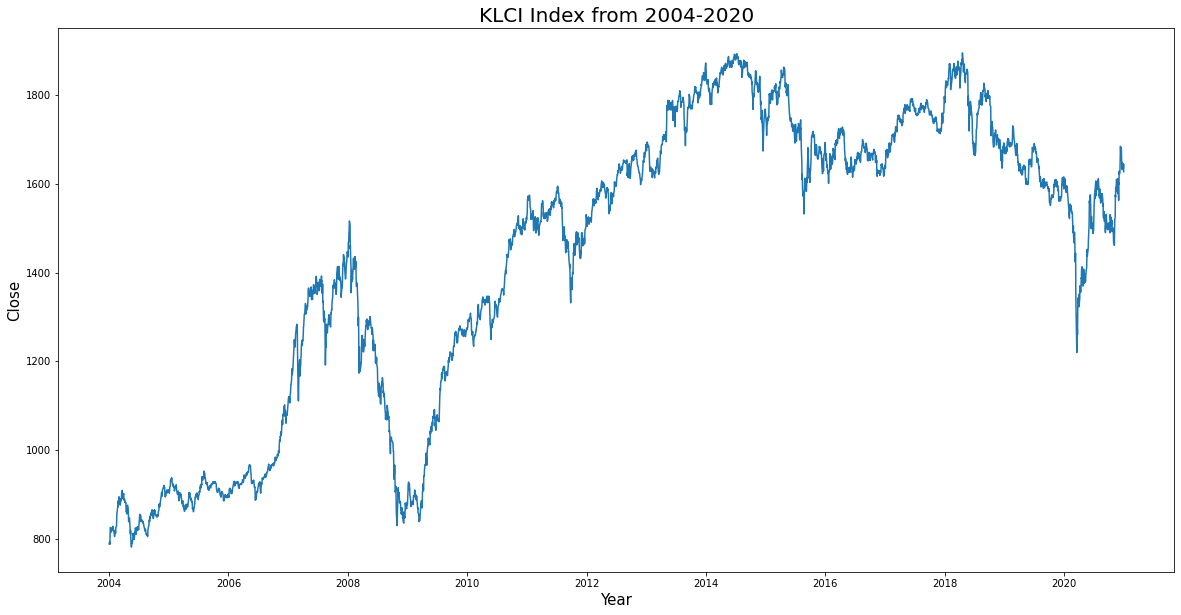

In [12]:
#Trendline for KLCI
plt.figure(figsize=(20,10))
sns.lineplot(x=KLCI.Date,y=KLCI.Close)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.title('KLCI Index from 2004-2020',fontsize=20)

# Bluechip Stock
## List 10 stock from bluechip


1.   Maybank (MAYBANK)
2.   Publicbank (PBBANK)
3.   Petronas Chemical (PCHEM)
4.   Tenaga Nasional (TENAGA)
5.   IHH HealthCare Berhad (IHH)
6.   Cimb bank (CIMB)
7.   TopGlove (TOPGLOV)
8.   Axiata (AXIATA)
9.   Nestle (NESM)
10.  Genting Berhad 



In [13]:
#maybank stock price
MAYBANK = bursa[bursa['Stock']=='MAYBANK']
#Publicbank
PBBANK = bursa[bursa['Stock']=='PBBANK']
#pchem
PCHEM = bursa[bursa['Stock']=='PCHEM']
#Tenaga
TENAGA = bursa[bursa['Stock']=='TENAGA']
#IHH
IHH = bursa[bursa['Stock']=='IHH']
#CIMB
CIMB = bursa[bursa['Stock']=='CIMB']
#TopGLov
TOPGLOV = bursa[bursa['Stock']=='TOPGLOV']
#Axiata
AXIATA = bursa[bursa['Stock']=='AXIATA']
#Nestle
NESM = bursa[bursa['Stock']=='NESTLE']
#Genting
GENM = bursa[bursa['Stock']=='GENM']


## MAYBANK

In [14]:
#maybank
maybank = df[df['stock_name'].str.contains('MAYBANK')].sort_values(by=['qrd'],ascending=1)
maybank

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
221,MALAYAN BANKING BERHAD,MAYBANK,2005-03-31,3,2005-06-30,2005-05-13,2489373000,2.398388e+09,7556440000,7.038551e+09,9.118570e+08,1.030938e+09,2.686197e+09,2.530473e+09,6.866690e+08,6.838740e+08,1.935231e+09,1.777790e+09,569397,2005,2005
459,MALAYAN BANKING BERHAD,MAYBANK,2005-06-30,4,2005-06-30,2005-09-01,3659447000,3.365745e+09,11215887000,1.040430e+10,8.082950e+08,8.281240e+08,3.494492e+09,3.358597e+09,5.672950e+08,6.467210e+08,2.502526e+09,2.424511e+09,572589,2005,2005
2772,MALAYAN BANKING BERHAD,MAYBANK,2007-06-30,1,2006-09-30,2006-11-14,3562412000,3.163034e+09,3562412000,3.163034e+09,8.809010e+08,9.468780e+08,8.809010e+08,9.468780e+08,5.932060e+08,6.794600e+08,5.932060e+08,6.794600e+08,587944,2007,2006
1951,MALAYAN BANKING BERHAD,MAYBANK,2007-06-30,3,2007-03-31,2007-05-11,3973790000,3.329087e+09,11001091000,9.787302e+09,1.016519e+09,9.464800e+08,3.025503e+09,2.812964e+09,7.604660e+08,6.698840e+08,2.179017e+09,1.990366e+09,582620,2007,2007
2567,MALAYAN BANKING BERHAD,MAYBANK,2008-06-30,4,2008-06-30,2008-08-27,4492540000,4.213098e+09,16153942000,1.517931e+10,1.018735e+09,1.331299e+09,4.086070e+09,4.363698e+09,7.567450e+08,1.067994e+09,3.002340e+09,3.252871e+09,586733,2008,2008
1399,MALAYAN BANKING BERHAD,MAYBANK,2009-06-30,3,2009-03-31,2009-05-21,4265120000,3.737527e+09,12727468000,1.166140e+10,6.539010e+08,1.020004e+09,2.495960e+09,3.067335e+09,5.088970e+08,7.674530e+08,1.814321e+09,2.245595e+09,579099,2009,2009
3568,MALAYAN BANKING BERHAD,MAYBANK,2010-06-30,3,2010-03-31,2010-05-13,4586454000,4.265121e+09,13822918000,1.272747e+10,1.455145e+09,6.539000e+08,4.011314e+09,2.495959e+09,1.063284e+09,5.088960e+08,2.993417e+09,1.814320e+09,593340,2010,2010
4012,MALAYAN BANKING BERHAD,MAYBANK,2010-06-30,4,2010-06-30,2010-08-20,4737314000,4.858868e+09,18560232000,1.758634e+10,1.359094e+09,-8.216680e+08,5.370408e+09,1.674292e+09,9.750330e+08,-1.063607e+09,3.968450e+09,7.507140e+08,596302,2010,2010
3608,MALAYAN BANKING BERHAD,MAYBANK,2011-06-30,2,2010-12-31,2011-02-21,5188639000,4.671338e+09,10190563000,9.236464e+09,1.562020e+09,1.399954e+09,2.966365e+09,2.556169e+09,1.126634e+09,1.023380e+09,2.180274e+09,1.930133e+09,593635,2011,2011
4782,MALAYAN BANKING BERHAD,MAYBANK,2011-06-30,4,2011-06-30,2011-08-22,5720999000,4.737314e+09,21039643000,1.856023e+10,1.728529e+09,1.359094e+09,6.270467e+09,5.370408e+09,1.253222e+09,9.750330e+08,4.619758e+09,3.968450e+09,601566,2011,2011


### Revenue

Text(0.5, 0.98, 'Revenue')

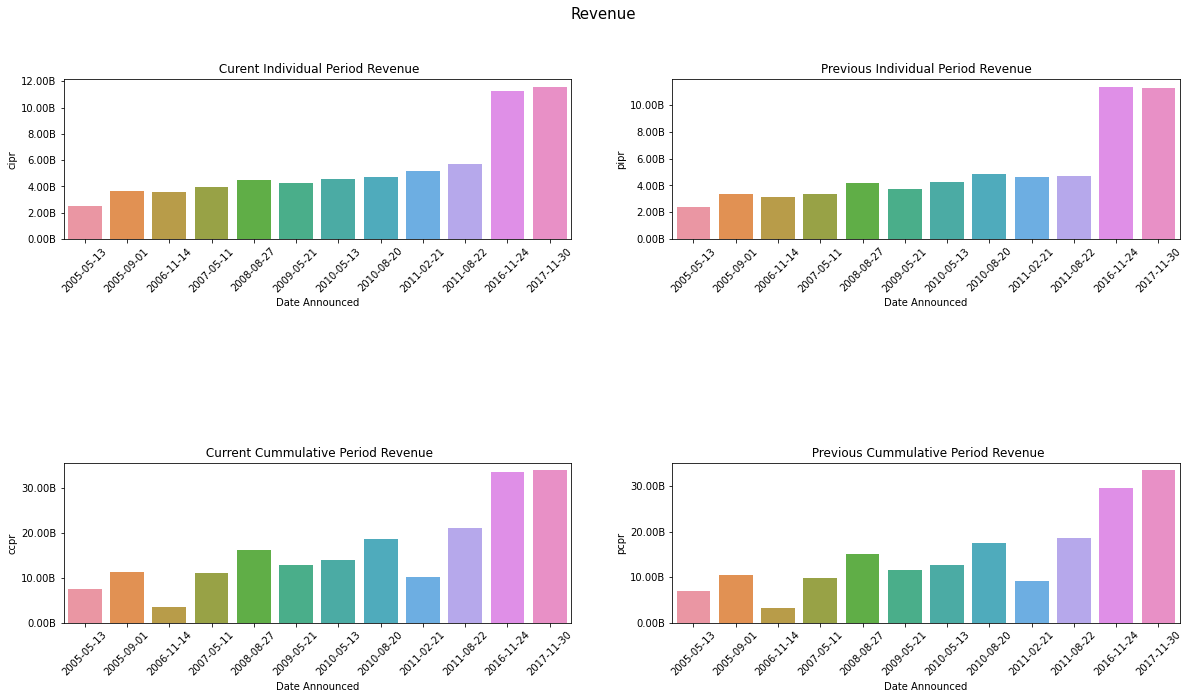

In [29]:
#revenue for maybank
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
'''
subplot(3,2,[4,5])
sns.lineplot(x=MAYBANK.Date, y= MAYBANK.Close)
plt.title('Stock Price')
'''
plt.suptitle('Revenue',fontsize=15)




### Profit loss before tax


Text(0.5, 0.98, 'Profit/Loss Before tax')

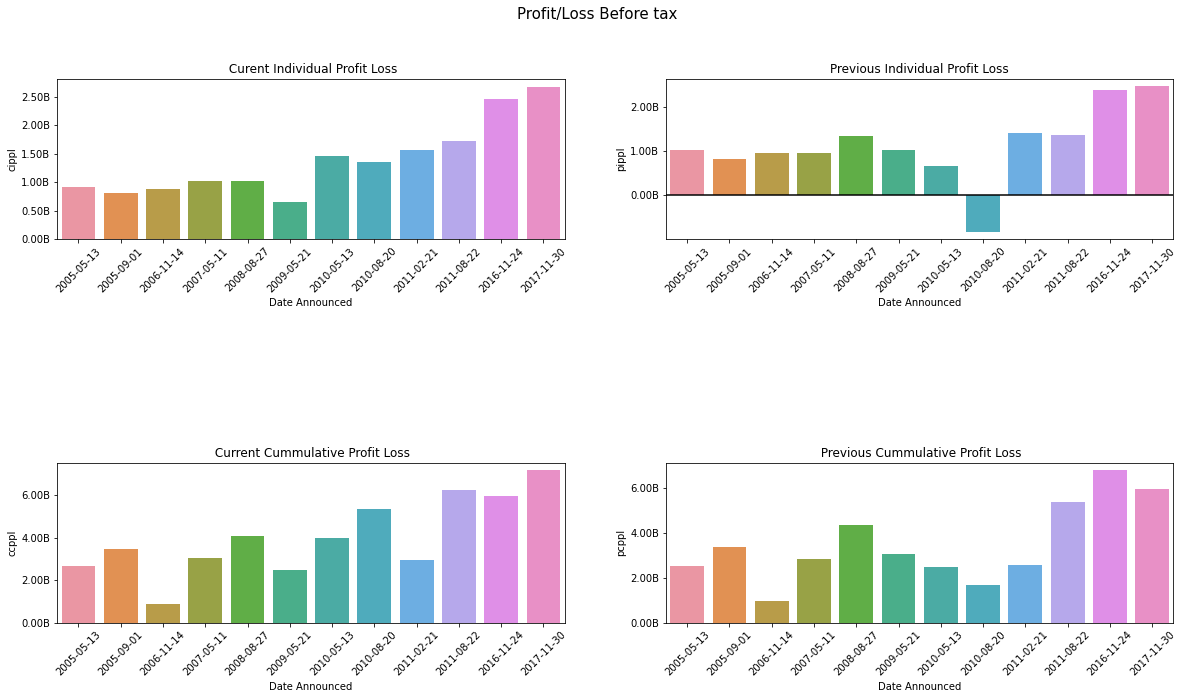

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
'''
subplot(3,2,[4,5])
sns.lineplot(x=MAYBANK.Date, y= MAYBANK.Close)
plt.title('Stock Price')
'''
plt.suptitle('Profit/Loss Before tax',fontsize=15)

### Profit/Loss after tax

Text(0.5, 0.98, 'Profit/Loss After tax')

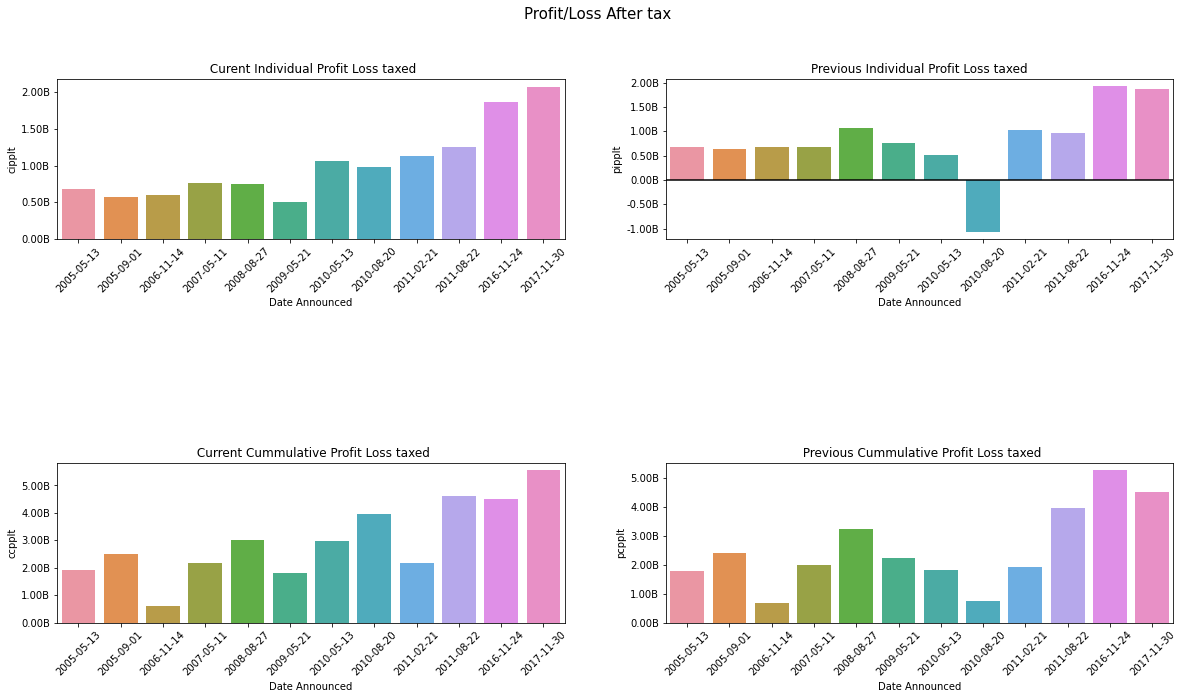

In [31]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = maybank.date_announced.dt.date, y= maybank.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
'''
plt.subplot(3,2,[3,4])
sns.lineplot(x=MAYBANK.Date, y= MAYBANK.Close)
plt.title('Stock Price')
'''
plt.suptitle('Profit/Loss After tax',fontsize=15)

In [ ]:
MAYBANK

,Code,Stock,Date,Close
2057605,1155,MAYBANK,2000-01-03,6.657715
2057606,1155,MAYBANK,2000-01-04,6.705613
2057607,1155,MAYBANK,2000-01-05,6.657715
2057608,1155,MAYBANK,2000-01-06,6.609818
2057609,1155,MAYBANK,2000-01-07,6.609818
...,...,...,...,...
2062965,1155,MAYBANK,2021-05-11,8.190000
2062966,1155,MAYBANK,2021-05-12,8.210000
2062967,1155,MAYBANK,2021-05-17,8.300000
2062968,1155,MAYBANK,2021-05-18,8.390000


In [32]:
MAYBANK= MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2005,1,1)) & (MAYBANK['Date'] <= datetime.datetime(2017,12,31))]
MAYBANK

,Code,Stock,Date,Close
2058910,1155,MAYBANK,2005-01-03,8.477810
2058911,1155,MAYBANK,2005-01-04,8.477810
2058912,1155,MAYBANK,2005-01-05,8.477810
2058913,1155,MAYBANK,2005-01-06,8.405965
2058914,1155,MAYBANK,2005-01-07,8.477810
...,...,...,...,...
2062136,1155,MAYBANK,2017-12-25,9.480000
2062137,1155,MAYBANK,2017-12-26,9.470000
2062138,1155,MAYBANK,2017-12-27,9.550000
2062139,1155,MAYBANK,2017-12-28,9.560000


### Stock Price and KLCI Index Movement Prior To Announcement Date of Finacial Report 

Text(0.5, 0.98, 'MAYBANK and KLCI Index 2004-2017')

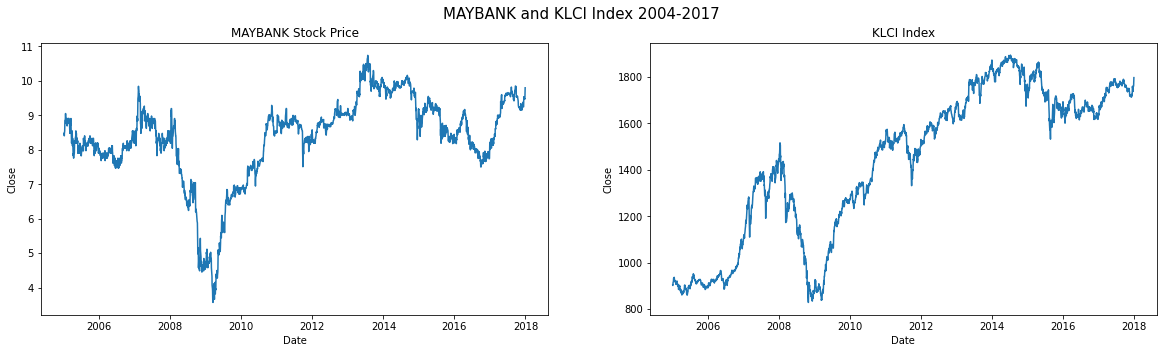

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x= MAYBANK.Date , y= MAYBANK.Close)
plt.title('MAYBANK Stock Price')

KLCIM = KLCI[(KLCI['Date'] >= datetime.datetime(2005,1,1)) & (KLCI['Date'] <= datetime.datetime(2017,12,31))]
plt.subplot(1,2,2)
sns.lineplot(x= KLCIM.Date, y= KLCIM.Close)
plt.title('KLCI Index')
plt.suptitle('MAYBANK and KLCI Index 2004-2017',fontsize=15)



In [84]:
MAYBANK.describe()

,Close
count,3223.000000
mean,8.336159
std,1.248242
min,3.574331
25%,7.903044
50%,8.520000
75%,9.090000
max,10.740000


In [89]:
MAYBANK[MAYBANK['Close']==3.574331]

,Code,Stock,Date,Close
2059959,1155,MAYBANK,2009-03-16,3.574331


In [85]:
KLCIM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3197.000000,3197.000000,3197.000000,3197.000000,3.197000e+03,3197.000000
mean,1434.694797,1424.250262,1429.626403,1429.888946,1.454249e+08,1429.888946
std,322.822421,322.273269,322.551124,322.509183,8.562159e+07,322.509183
min,837.690002,801.270020,830.440002,829.409973,0.000000e+00,829.409973
25%,1182.329956,1168.640015,1174.959961,1177.530029,9.708590e+07,1177.530029
50%,1521.199951,1509.369995,1515.800049,1515.050049,1.253149e+08,1515.050049
75%,1710.430054,1699.699951,1703.260010,1706.260010,1.668082e+08,1706.260010
max,1896.229980,1891.660034,1894.469971,1892.650024,8.168589e+08,1892.650024


In [93]:
KLCIM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3197 entries, 245 to 3441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3197 non-null   datetime64[ns]
 1   High       3197 non-null   float64       
 2   Low        3197 non-null   float64       
 3   Open       3197 non-null   float64       
 4   Close      3197 non-null   float64       
 5   Volume     3197 non-null   float64       
 6   Adj Close  3197 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 199.8 KB


In [99]:
KLCIM[KLCIM['Close']==829]

,Date,High,Low,Open,Close,Volume,Adj Close


In [42]:
maybank

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
221,MALAYAN BANKING BERHAD,MAYBANK,2005-03-31,3,2005-06-30,2005-05-13,2489373000,2.398388e+09,7556440000,7.038551e+09,9.118570e+08,1.030938e+09,2.686197e+09,2.530473e+09,6.866690e+08,6.838740e+08,1.935231e+09,1.777790e+09,569397,2005,2005
459,MALAYAN BANKING BERHAD,MAYBANK,2005-06-30,4,2005-06-30,2005-09-01,3659447000,3.365745e+09,11215887000,1.040430e+10,8.082950e+08,8.281240e+08,3.494492e+09,3.358597e+09,5.672950e+08,6.467210e+08,2.502526e+09,2.424511e+09,572589,2005,2005
2772,MALAYAN BANKING BERHAD,MAYBANK,2007-06-30,1,2006-09-30,2006-11-14,3562412000,3.163034e+09,3562412000,3.163034e+09,8.809010e+08,9.468780e+08,8.809010e+08,9.468780e+08,5.932060e+08,6.794600e+08,5.932060e+08,6.794600e+08,587944,2007,2006
1951,MALAYAN BANKING BERHAD,MAYBANK,2007-06-30,3,2007-03-31,2007-05-11,3973790000,3.329087e+09,11001091000,9.787302e+09,1.016519e+09,9.464800e+08,3.025503e+09,2.812964e+09,7.604660e+08,6.698840e+08,2.179017e+09,1.990366e+09,582620,2007,2007
2567,MALAYAN BANKING BERHAD,MAYBANK,2008-06-30,4,2008-06-30,2008-08-27,4492540000,4.213098e+09,16153942000,1.517931e+10,1.018735e+09,1.331299e+09,4.086070e+09,4.363698e+09,7.567450e+08,1.067994e+09,3.002340e+09,3.252871e+09,586733,2008,2008
1399,MALAYAN BANKING BERHAD,MAYBANK,2009-06-30,3,2009-03-31,2009-05-21,4265120000,3.737527e+09,12727468000,1.166140e+10,6.539010e+08,1.020004e+09,2.495960e+09,3.067335e+09,5.088970e+08,7.674530e+08,1.814321e+09,2.245595e+09,579099,2009,2009
3568,MALAYAN BANKING BERHAD,MAYBANK,2010-06-30,3,2010-03-31,2010-05-13,4586454000,4.265121e+09,13822918000,1.272747e+10,1.455145e+09,6.539000e+08,4.011314e+09,2.495959e+09,1.063284e+09,5.088960e+08,2.993417e+09,1.814320e+09,593340,2010,2010
4012,MALAYAN BANKING BERHAD,MAYBANK,2010-06-30,4,2010-06-30,2010-08-20,4737314000,4.858868e+09,18560232000,1.758634e+10,1.359094e+09,-8.216680e+08,5.370408e+09,1.674292e+09,9.750330e+08,-1.063607e+09,3.968450e+09,7.507140e+08,596302,2010,2010
3608,MALAYAN BANKING BERHAD,MAYBANK,2011-06-30,2,2010-12-31,2011-02-21,5188639000,4.671338e+09,10190563000,9.236464e+09,1.562020e+09,1.399954e+09,2.966365e+09,2.556169e+09,1.126634e+09,1.023380e+09,2.180274e+09,1.930133e+09,593635,2011,2011
4782,MALAYAN BANKING BERHAD,MAYBANK,2011-06-30,4,2011-06-30,2011-08-22,5720999000,4.737314e+09,21039643000,1.856023e+10,1.728529e+09,1.359094e+09,6.270467e+09,5.370408e+09,1.253222e+09,9.750330e+08,4.619758e+09,3.968450e+09,601566,2011,2011


Text(0.5, 0.98, 'MAYBANK and KLCI in  13 May 2005 - 13 June 2005')

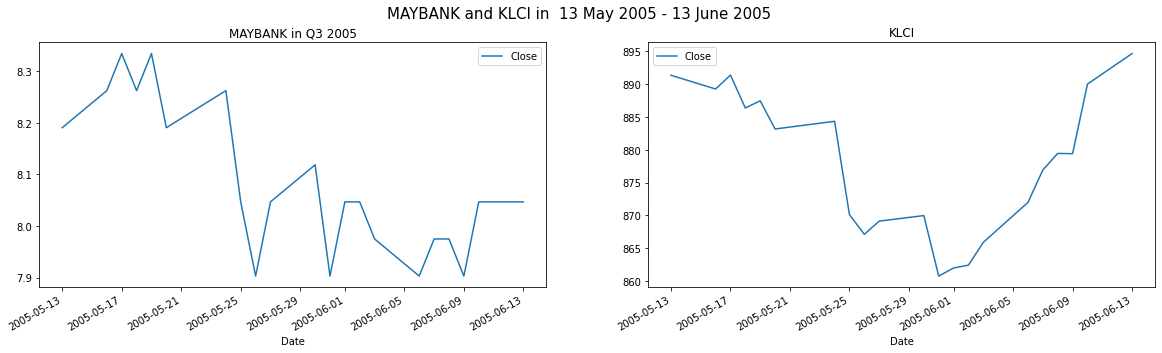

In [77]:
#plt.figure(figsize=(20,10))
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)


MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2005,5,13)) & (MAYBANK['Date'] <= datetime.datetime(2005,6,13))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q3 2005')

KLCI[(KLCI['Date'] >= datetime.datetime(2005,5,13)) & (KLCI['Date'] <= datetime.datetime(2005,6,13))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI in  13 May 2005 - 13 June 2005',fontsize=15)



Text(0.5, 0.98, 'MAYBANK and KLCI in  1 September 2005 - 1 October 2005')

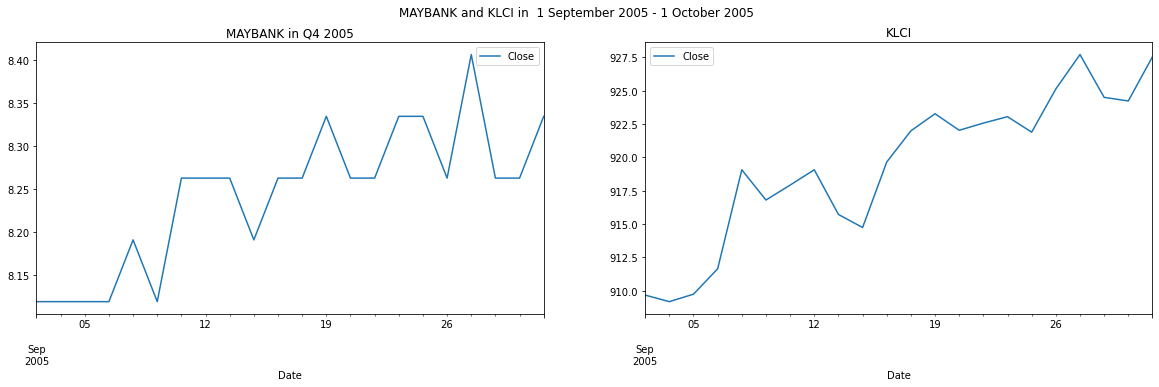

In [78]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2005,9,1)) & (MAYBANK['Date'] <= datetime.datetime(2005,10,1))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q4 2005')

KLCI[(KLCI['Date'] >= datetime.datetime(2005,9,1)) & (KLCI['Date'] <= datetime.datetime(2005,10,1))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI in  1 September 2005 - 1 October 2005')


Text(0.5, 0.98, 'MAYBANK and KLCI 14 November 2006- 14 December 2006')

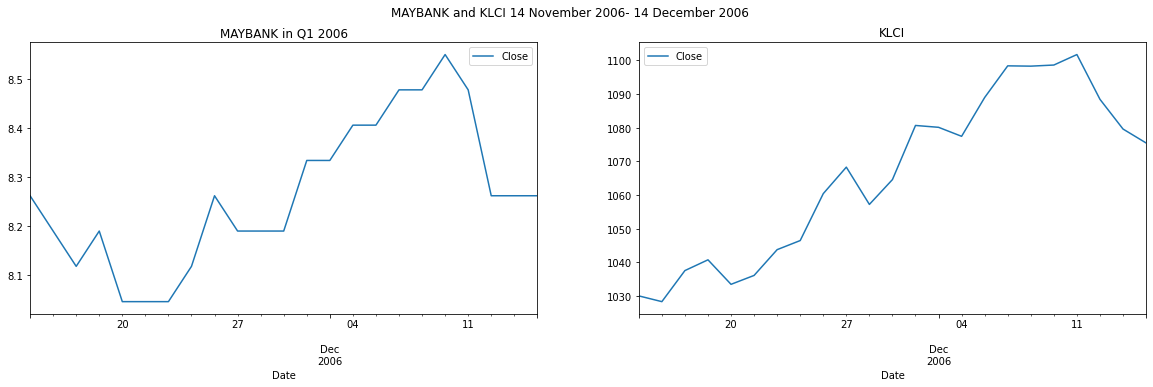

In [79]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2006,11,14)) & (MAYBANK['Date'] <= datetime.datetime(2006,12,14))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q1 2006')

KLCI[(KLCI['Date'] >= datetime.datetime(2006,11,14)) & (KLCI['Date'] <= datetime.datetime(2006,12,14))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI 14 November 2006- 14 December 2006' )

Text(0.5, 0.98, 'MAYBANK and KLCI 11 May 2007- 11 June 2007')

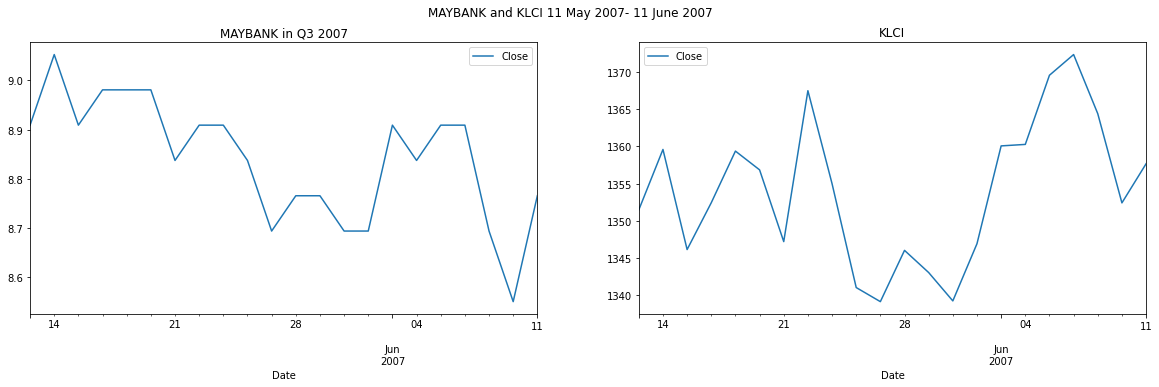

In [80]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2007,5,11)) & (MAYBANK['Date'] <= datetime.datetime(2007,6,11))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q3 2007')

KLCI[(KLCI['Date'] >= datetime.datetime(2007,5,11)) & (KLCI['Date'] <= datetime.datetime(2007,6,11))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI 11 May 2007- 11 June 2007' )

Text(0.5, 0.98, 'MAYBANK and KLCI 27 September 2008- 27 Oktober 2008')

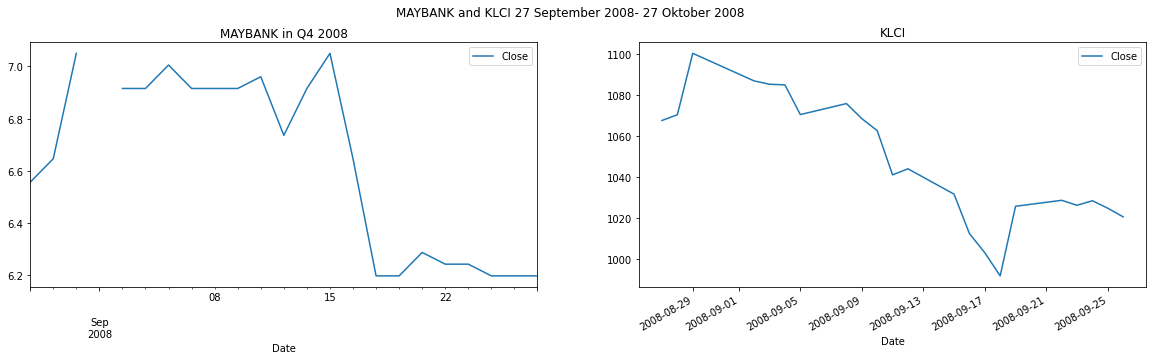

In [81]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2008,8,27)) & (MAYBANK['Date'] <= datetime.datetime(2008,9,27))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q4 2008')

KLCI[(KLCI['Date'] >= datetime.datetime(2008,8,27)) & (KLCI['Date'] <= datetime.datetime(2008,9,27))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI 27 September 2008- 27 Oktober 2008' )

Text(0.5, 0.98, 'MAYBANK and KLCI 21 May 2009 - 21 June 2009')

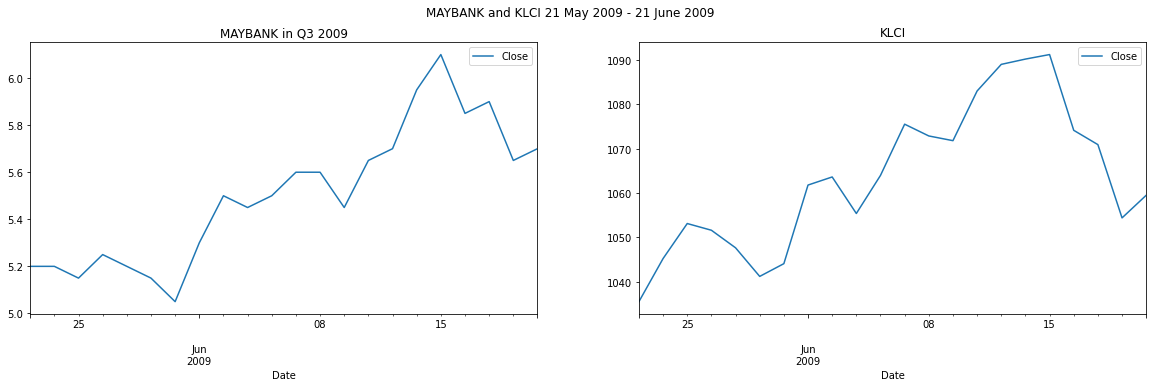

In [82]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2009,5,21)) & (MAYBANK['Date'] <= datetime.datetime(2009,6,21))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q3 2009')

KLCI[(KLCI['Date'] >= datetime.datetime(2009,5,21)) & (KLCI['Date'] <= datetime.datetime(2009,6,21))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI 21 May 2009 - 21 June 2009' )

Text(0.5, 0.98, 'MAYBANK and KLCI 13 May 2010 - 13 June 2010')

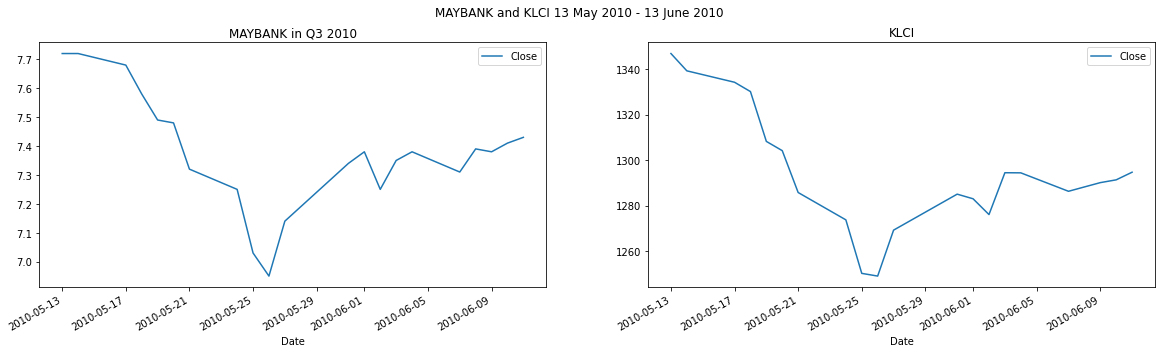

In [100]:
fig, axes = plt.subplots(figsize=(20,5),nrows=1, ncols=2)

MAYBANK[(MAYBANK['Date'] >= datetime.datetime(2010,5,13)) & (MAYBANK['Date'] <= datetime.datetime(2010,6,13))].plot.line(x='Date',y='Close',ax=axes[0],title ='MAYBANK in Q3 2010')

KLCI[(KLCI['Date'] >= datetime.datetime(2010,5,13)) & (KLCI['Date'] <= datetime.datetime(2010,6,13))].plot.line(x='Date',y='Close',ax=axes[1],title = 'KLCI')
plt.suptitle('MAYBANK and KLCI 13 May 2010 - 13 June 2010' )

## PUBLIC BANK

In [101]:
#Public bank
pbbank = df[df['stock_name'].str.contains('PBBANK')].sort_values(by=['qrd'],ascending=1)
pbbank

,company,stock_name,fye,qtr,qrd,date_announced,cipr,pipr,ccpr,pcpr,cippl,pippl,ccppl,pcppl,cipplt,pipplt,ccpplt,pcpplt,ref,Year,Year_ann
526,PUBLIC BANK BERHAD,PBBANK,2005-12-31,4,2005-12-31,2006-01-23,1559363000,1.425030e+09,5919711000,5.045340e+09,5.473810e+08,5.069070e+08,2.048670e+09,1.853874e+09,3.911340e+08,3.389240e+08,1.450281e+09,1.271073e+09,573393,2005,2006
1779,PUBLIC BANK BERHAD,PBBANK,2008-12-31,4,2008-12-31,2009-01-20,2557557000,2.573079e+09,10500307000,9.557599e+09,8.129430e+08,8.212010e+08,3.379188e+09,3.003638e+09,6.566070e+08,6.078430e+08,2.622660e+09,2.201786e+09,581477,2008,2009
3586,PUBLIC BANK BERHAD,PBBANK,2010-12-31,1,2010-03-31,2010-04-15,2507759000,2.431461e+09,2507759000,2.431461e+09,9.225750e+08,7.449280e+08,9.225750e+08,7.449280e+08,6.976540e+08,5.958130e+08,6.976540e+08,5.958130e+08,593471,2010,2010
5007,PUBLIC BANK BERHAD,PBBANK,2011-12-31,4,2011-12-31,2012-01-30,3321633000,2.971194e+09,12756360000,1.103560e+10,1.163267e+09,1.130264e+09,4.610633e+09,4.086197e+09,8.860540e+08,8.600950e+08,3.524024e+09,3.099077e+09,602969,2011,2012
5626,PUBLIC BANK BERHAD,PBBANK,2013-12-31,3,2013-09-30,2013-10-22,3869542000,3.588750e+09,11345627000,1.042804e+10,1.358164e+09,1.298363e+09,3.968698e+09,3.755905e+09,1.057362e+09,9.815100e+08,3.070571e+09,2.872591e+09,2259751,2013,2013
7706,PUBLIC BANK BERHAD,PBBANK,2017-12-31,1,2017-03-31,2017-04-20,5028185000,5.007301e+09,5028185000,5.007301e+09,1.631472e+09,1.651558e+09,1.631472e+09,1.651558e+09,1.265343e+09,1.245060e+09,1.265343e+09,1.245060e+09,2752655,2017,2017
8570,PUBLIC BANK BERHAD,PBBANK,2018-12-31,3,2018-09-30,2018-10-25,5624676000,5.312292e+09,16409767000,1.550762e+10,1.759761e+09,1.792954e+09,5.311446e+09,5.160435e+09,1.401580e+09,1.424270e+09,4.239871e+09,4.041614e+09,2899370,2018,2018


### Revenue

Text(0.5, 0.98, 'Revenue')

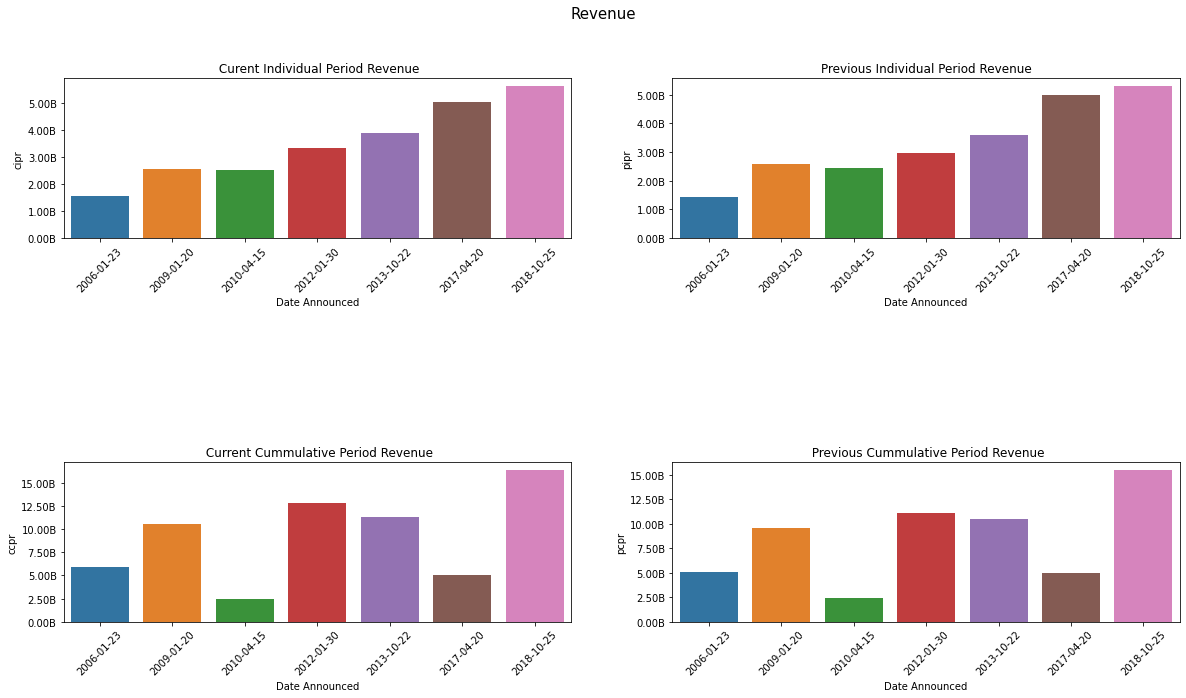

In [103]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.cipr)
plt.title(' Curent Individual Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.pipr)
plt.title('Previous Individual Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.ccpr)
plt.title(' Current Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.pcpr)
plt.title(' Previous Cummulative Period Revenue')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Revenue',fontsize=15)

### Profit loss before tax

Text(0.5, 0.98, 'Profit/Loss Before tax')

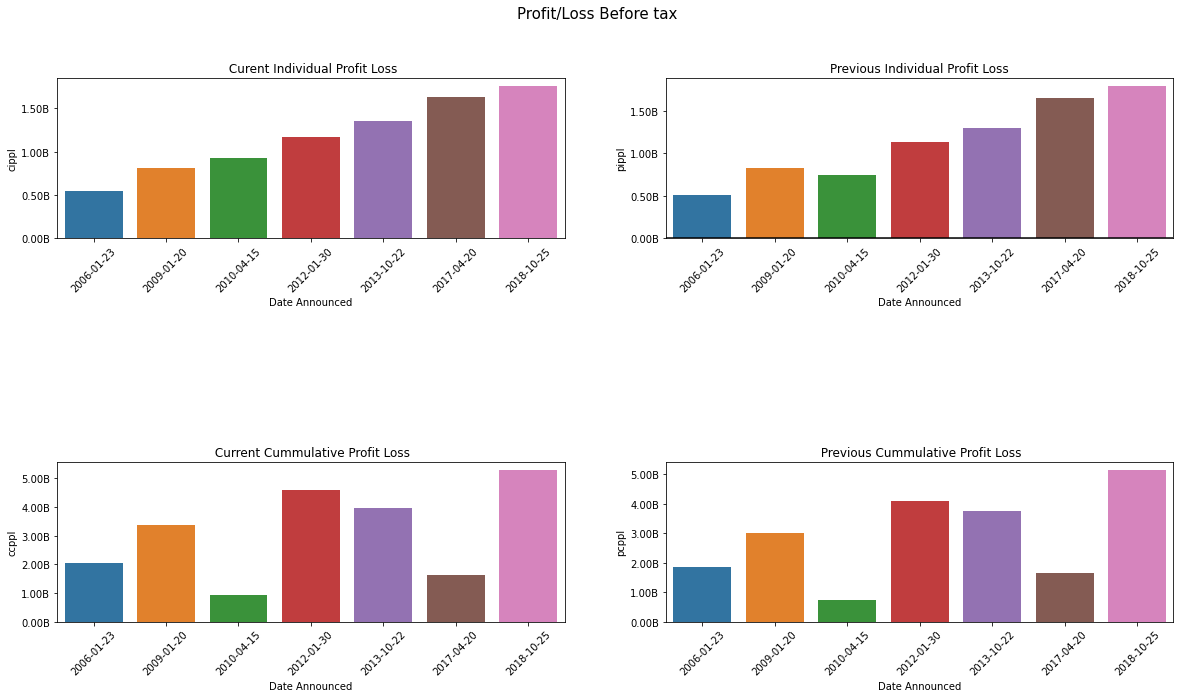

In [104]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.cippl)
plt.title(' Curent Individual Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,2)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.pippl)
plt.title('Previous Individual Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.ccppl)
plt.title(' Current Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.pcppl)
plt.title(' Previous Cummulative Profit Loss')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss Before tax',fontsize=15)

Text(0.5, 0.98, 'Profit/Loss After tax')

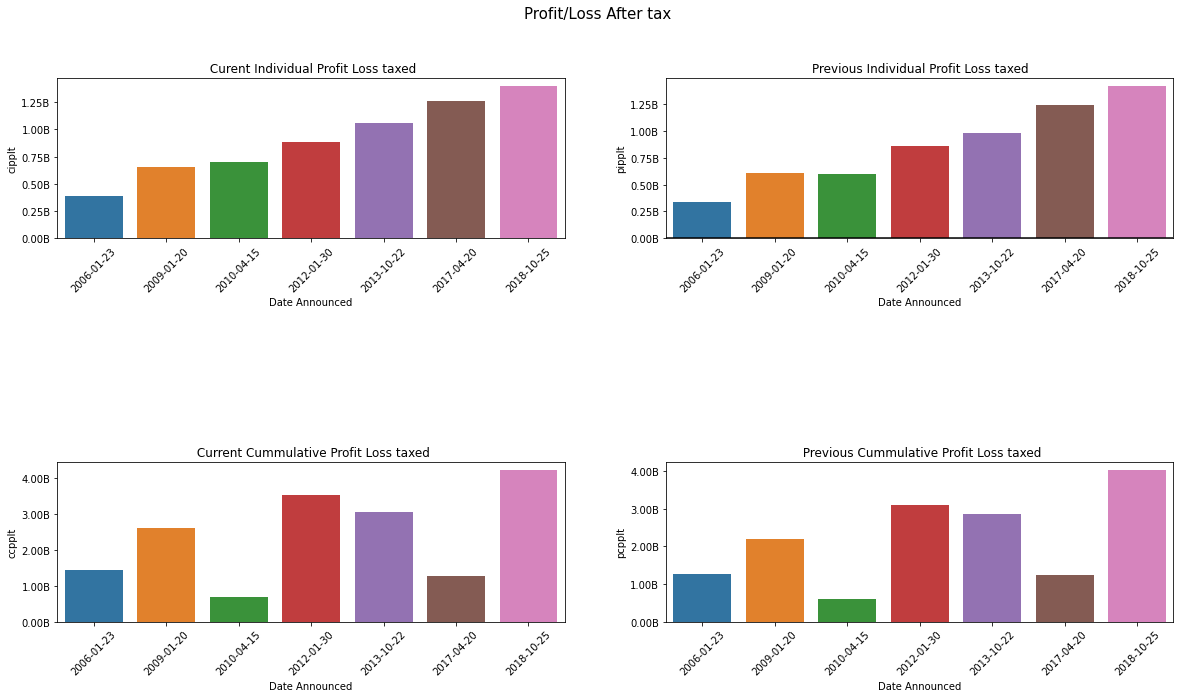

In [105]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.cipplt)
plt.title(' Curent Individual Profit Loss taxed')
plt.xlabel('Date Announced')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)
plt.xticks(rotation =45)

plt.subplot(3,2,2)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.pipplt)
plt.title('Previous Individual Profit Loss taxed')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
plt.axhline(y=0, linestyle = 'solid', color= 'black')
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,5)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.ccpplt)
plt.title(' Current Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.subplot(3,2,6)
x = sns.barplot(x = pbbank.date_announced.dt.date, y= pbbank.pcpplt)
plt.title(' Previous Cummulative Profit Loss taxed')
plt.xlabel('Date Announced')
plt.xticks(rotation =45)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in x.get_yticks()/1000000000]
x.set_yticklabels(ylabels)

plt.suptitle('Profit/Loss After tax',fontsize=15)

In [ ]:
#PCHEM
pchem= df[df['stock_name'].str.contains('PCHEM')]
pchem